## Imports

In [14]:
import gymnasium as gym
from huggingface_sb3 import load_from_hub, package_to_hub
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
import optuna
import matplotlib.pyplot as plt
import numpy as np

## Hyperparameter-Tuing

Da das Hyperparameter-Tuning viel Zeit beansprucht, wurde es in der Abgabe-Version auskommentiert.

In [4]:
# def optimize_hyperparameters(trial: optuna.Trial) -> float:
#     # Sample hyperparameters for the PPO agent
#     n_steps = trial.suggest_int('n_steps', 512, 2048, log=True)
#     batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
#     gamma = trial.suggest_float('gamma', 0.9, 0.999, log=True)
#     gae_lambda = trial.suggest_float('gae_lambda', 0.8, 0.99)
#     ent_coef = trial.suggest_float('ent_coef', 0.001, 0.1, log=True)

#     # Create the LunarLander-v2 environment
#     env_id = 'LunarLander-v2'
#     env = gym.make(env_id)

#     # Wrap the environment with a Monitor to log the training progress
#     env = Monitor(env, "logs/")

#     # Create a vectorized environment
#     env = make_vec_env(env_id, n_envs=4)

#     # Create the PPO agent with sampled hyperparameters
#     model = PPO('MlpPolicy', env, verbose=1, n_steps=n_steps, batch_size=batch_size,
#                 gamma=gamma, gae_lambda=gae_lambda, ent_coef=ent_coef)

#     # Train the agent
#     model.learn(total_timesteps=1000000)

#     # Save the trained model
#     model.save("ppo_lunar_lander")

#     # Evaluate the trained agent
#     eval_env = gym.make(env_id)
#     eval_env = Monitor(eval_env, "eval_logs/")
#     mean_reward, _ = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)

#     return mean_reward

# def run_hyperparameter_optimization():
#     study = optuna.create_study(direction='maximize')
#     study.optimize(optimize_hyperparameters, n_trials=3)

#     print('Best hyperparameters:')
#     best_params = study.best_params
#     for key, value in best_params.items():
#         print(f'{key}: {value}')

# run_hyperparameter_optimization()

In [5]:
# Erstellung des Gym-Environments
env = gym.make('LunarLander-v2')

In [6]:
# Definition des Models mit getunten Hyperparametern 
model_hyper = PPO(
    policy="MlpPolicy",
    env=env,
    n_steps = 1024,
    batch_size = 32,
    gamma = 0.9999,
    verbose=1,)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [7]:
# Definition des Models mit  den Standard-Parametern der Bibliothek
model = PPO(
    policy="MlpPolicy",
    env=env,
    verbose=1,)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [8]:
# Training des Standard-Parameter-Models
model.learn(total_timesteps=1000000)
model_name = "ppo-LunarLander-v2"
model.save(model_name)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 84.3     |
|    ep_rew_mean     | -161     |
| time/              |          |
|    fps             | 723      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 109          |
|    ep_rew_mean          | -152         |
| time/                   |              |
|    fps                  | 531          |
|    iterations           | 2            |
|    time_elapsed         | 7            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0066643376 |
|    clip_fraction        | 0.0326       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | 0.00627      |
|    learning_r

In [9]:
# Training des getunten Models
model_hyper.learn(total_timesteps=1000000)
model_hyper_name = "ppo-LunarLander-v2"
model_hyper.save(model_hyper_name)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 96.4     |
|    ep_rew_mean     | -237     |
| time/              |          |
|    fps             | 649      |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 1024     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 104         |
|    ep_rew_mean          | -212        |
| time/                   |             |
|    fps                  | 381         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 2048        |
| train/                  |             |
|    approx_kl            | 0.005430229 |
|    clip_fraction        | 0.032       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -0.00136    |
|    learning_rate        | 0.

In [10]:
# Definition einer Plot-Funktion zur Veranschaulichung des Lernfortschritts
def training_plot(model,model_name):
    rewards = [ep_info['r'] for ep_info in model.ep_info_buffer]
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Belohnung')
    plt.title(model_name)
    plt.show()

In [11]:
# Definition einer Funktion zur Anzeige der durschnittlichen Belohnung inklusive Standardabweichung
def eval_model(model):
    eval_env = Monitor(gym.make("LunarLander-v2"))
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
    print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

In [21]:
# Grafische Darstellung des Lunar-Landers mit zufälligen Aktionen und Anzeige der Gesamtbelohnung
env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset(seed=420)

total_reward = 0  

for _ in range(1337):
    action = env.action_space.sample()  
    
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward 
    
    if terminated or truncated:
        observation, info = env.reset()

env.close()

print("Gesamtbelohnung zufällige Aktionen:", total_reward)  

Gesamtbelohnung zufällige Aktionen: -2260.860161134179


In [22]:
# Grafische Darstellung des Lunar-Landers mit geladenem, ungetunten Model Aktionen und Anzeige der Gesamtbelohnung

trained_model = model

env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset(seed=420)

total_reward = 0  

for _ in range(1337):
    action = trained_model.predict(observation)
    action = action[0]
    action = int(np.round(action))

    assert env.action_space.contains(action), "Ungültige Aktion"
    
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    
    if terminated or truncated:
        observation, info = env.reset()

env.close()

print("Gesamtbelohnung model:", total_reward)

Gesamtbelohnung model: 226.765489263894


In [23]:
# Grafische Darstellung des Lunar-Landers mit geladenem, getunten Model Aktionen und Anzeige der Gesamtbelohnung

trained_model_hyper = model_hyper

env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset(seed=420)

total_reward = 0 

for _ in range(1337):
    action = trained_model.predict(observation)
    action = action[0]
    action = int(np.round(action))

    assert env.action_space.contains(action), "Ungültige Aktion"
    
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward 
    
    if terminated or truncated:
        observation, info = env.reset()

env.close()

print("Gesamtbelohnung model_hyper:", total_reward)

Gesamtbelohnung model_hyper: 692.0342570362227


In [17]:
eval_model(model)

mean_reward=184.73 +/- 82.4727734037788


In [18]:
eval_model(model_hyper)

mean_reward=178.38 +/- 97.8045076474821


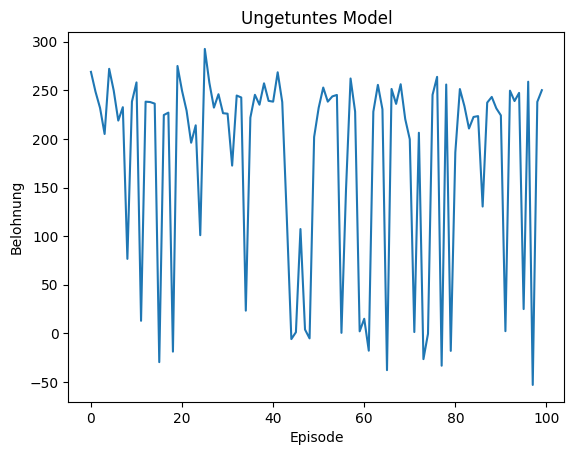

In [19]:
training_plot(model,"Ungetuntes Model")

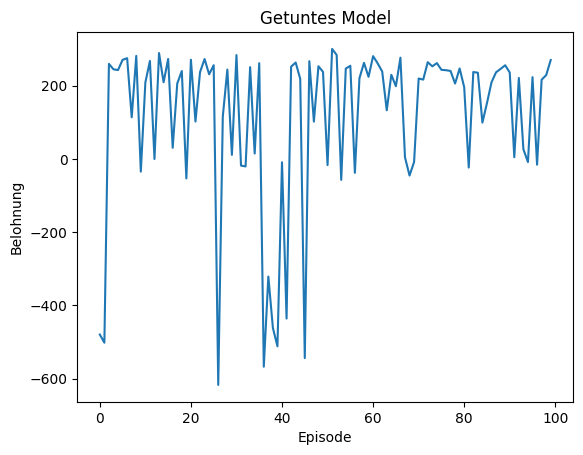

In [20]:
training_plot(model_hyper,"Getuntes Model")